<a href="https://colab.research.google.com/github/Mathmedeiros/Projeto-Analise-de-dados-do-Airbnb-NYC/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### **Projeto de Data Science**
*by [Matheus Medeiros](https://www.linkedin.com/in/matheushomedeiros/)*

---

# Análise dos Dados do Airbnb - *New York City*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à *New York City*, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in New York City (good for visualisations).*


In [ ]:
# importando os pacotes necessarios para a análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-06-02/visualisations/listings.csv")

In [ ]:
# Vamos observar como esses dados estão organizados com as primeiras 5 linhas do data frame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.34,3,308
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,79,1,403,2021-05-04,5.16,1,208
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.56,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,21,1,2014-01-02,0.01,1,134
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,61,2,474,2020-09-25,3.61,1,246


## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - distritos compostos por outros bairros
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.


In [ ]:
# identificar o volume de dados do DataFrame
# número de linhas:
print('Entradas: ', df.shape[0])
# número de colunas:
print('Variáveis: ', df.shape[1])
# verificar as 5 primeiras entradas do dataset
df.dtypes


Entradas:  36230
Variáveis:  16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com as mesmas 36230 entradas porém com 106 variáveis (`listings.csv.gz`).

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.261054
last_review                       0.261054
host_name                         0.000718
name                              0.000386
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 26% das entradas. Provavelmente alguns dos imóveis nunca tiveram nenhuma *review*.
* As variáveis `name` e `host_name` possuem alguns poucos valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma de cada uma das variáveis numéricas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f169c1ad0>,
      dtype=object)

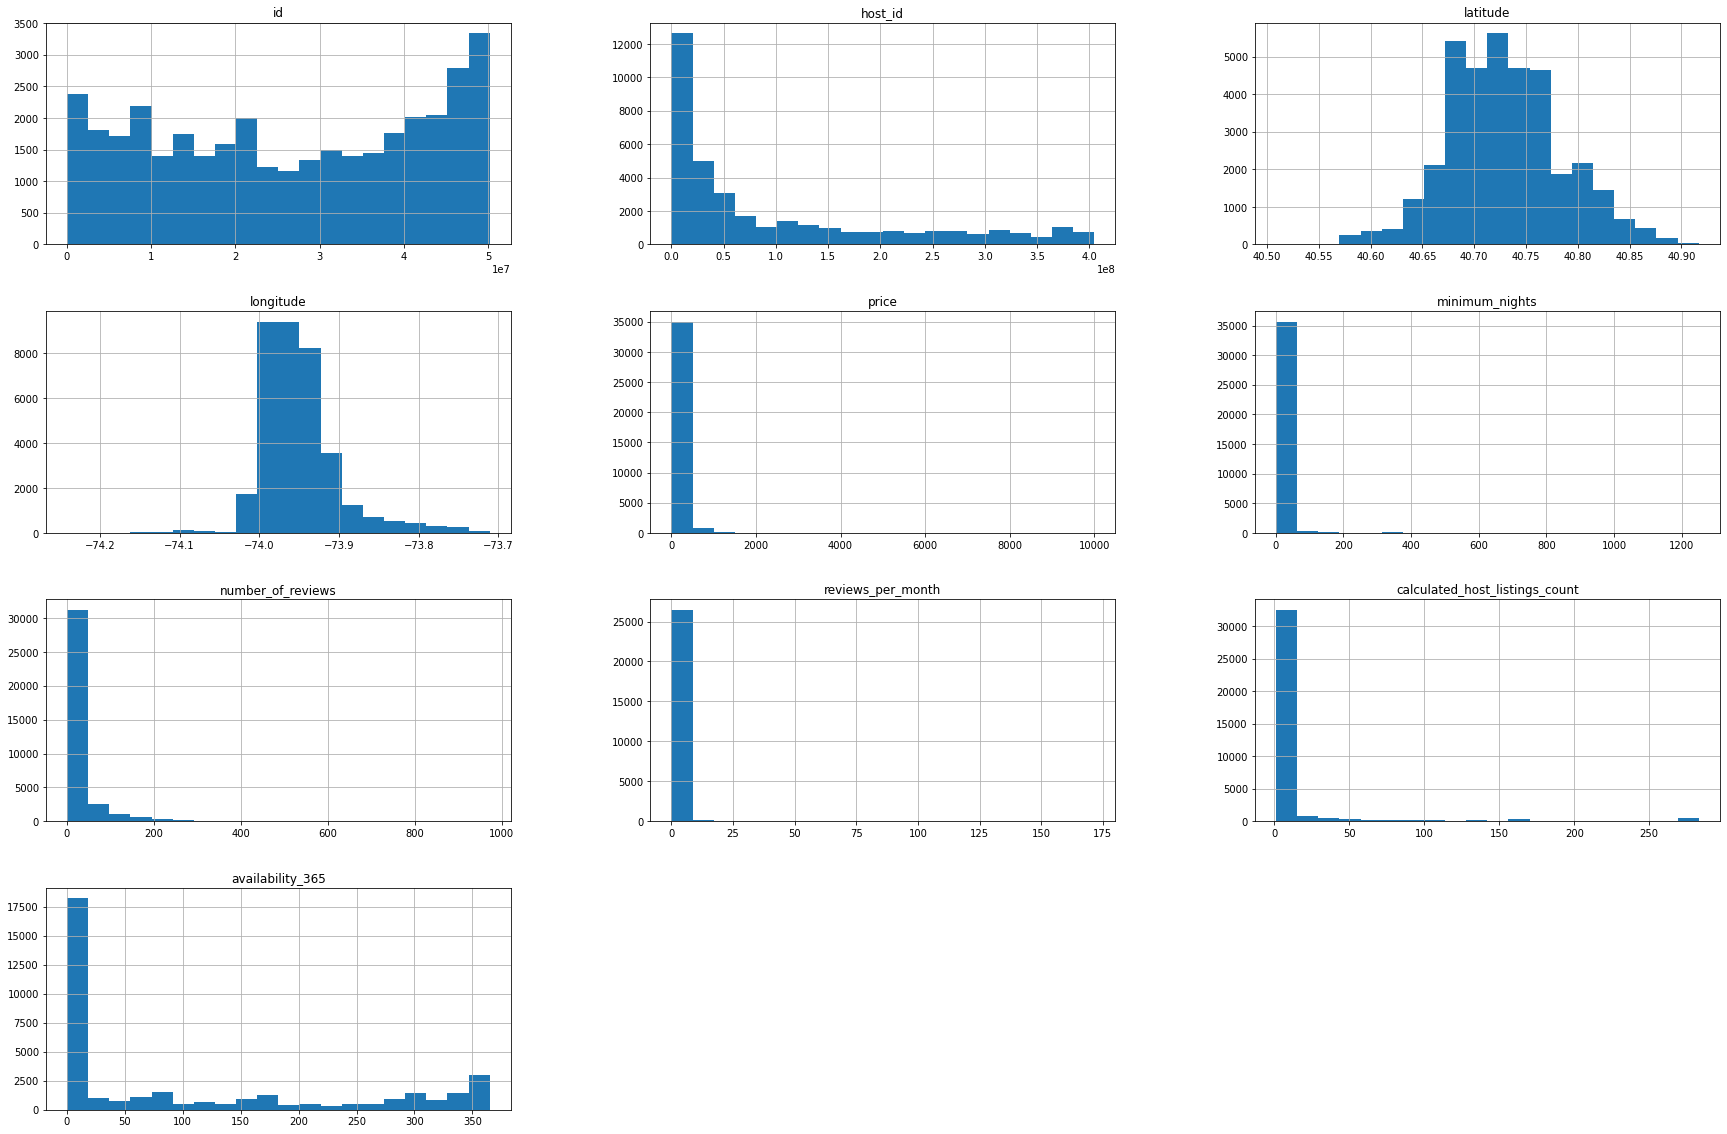

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 20, figsize = (30,20))

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores possuem uma grande dispersão, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

Resumo estatístico por meio do método describe()
Plotar boxplots para a variável.

In [ ]:
# Vamos verificar a presença de outliers apenas nas variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,36230.000000,36230.000000,36230.000000,26772.000000,36230.000000
mean,157.052332,23.092520,22.684460,1.199019,107.233646
std,295.210421,28.145009,48.620407,3.274870,134.738250
min,0.000000,1.000000,0.000000,0.010000,0.000000
25%,65.000000,3.000000,0.000000,0.110000,0.000000
50%,102.000000,30.000000,4.000000,0.400000,16.000000
75%,171.000000,30.000000,19.000000,1.340000,219.000000
max,10000.000000,1250.000000,972.000000,171.530000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável preço (`price`) possui 75% do valor abaixo de 171 dólares, porém seu valor máximo é 10000 dólares. Outro problema com esta mesma variável é que seu valor mínimo é zero, e esse valor não faz nenhum sentido para o aluguel de um imóvel.
* A quantidade mínima de noites (`minimum_nights`) é de até 30 noites para 75% das entradas, porém seu valor máximo é de 1250 noites.

Aplicaremos os gráficos e boxplot para essas duas variáveis para visualizar suas dispersões.

#### Boxplot para minimum_nights

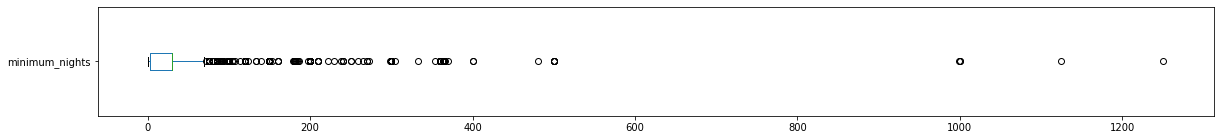

minimum_nights: valores acima de 30:
1384 entradas
3.8200%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(20, 2))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

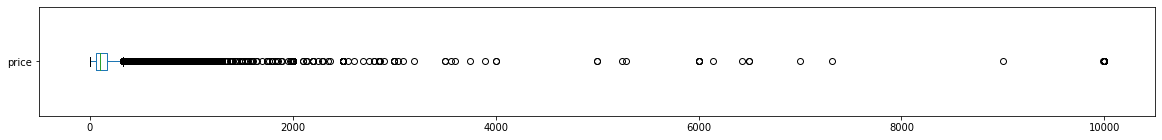


price: valores acima de $1000,00
291 entradas
0.8032%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(20, 2),)
plt.show()

# ver quantidade de valores acima de 1000 para price
print("\nprice: valores acima de $1000,00")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

Com os gráficos acima podemos observar como os valores acima de 30 noites para a variável `minimum_nights`são insignificantes e atrapalham a visualização dos histogramas gerados. O mesmo acontece com os valores acima de 1000 dólares para a variável `price`.

A seguir vamos plotar novamente os histogramas desconsiderando todos os valores acima de 30 para a variável `minimum_nights`e todos os valores acima de 2000 para a variável `price`. Lembrando que também é preciso retirar as entradas em que o preço é igual a zero.

#### **Histogramas sem *outliers***

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

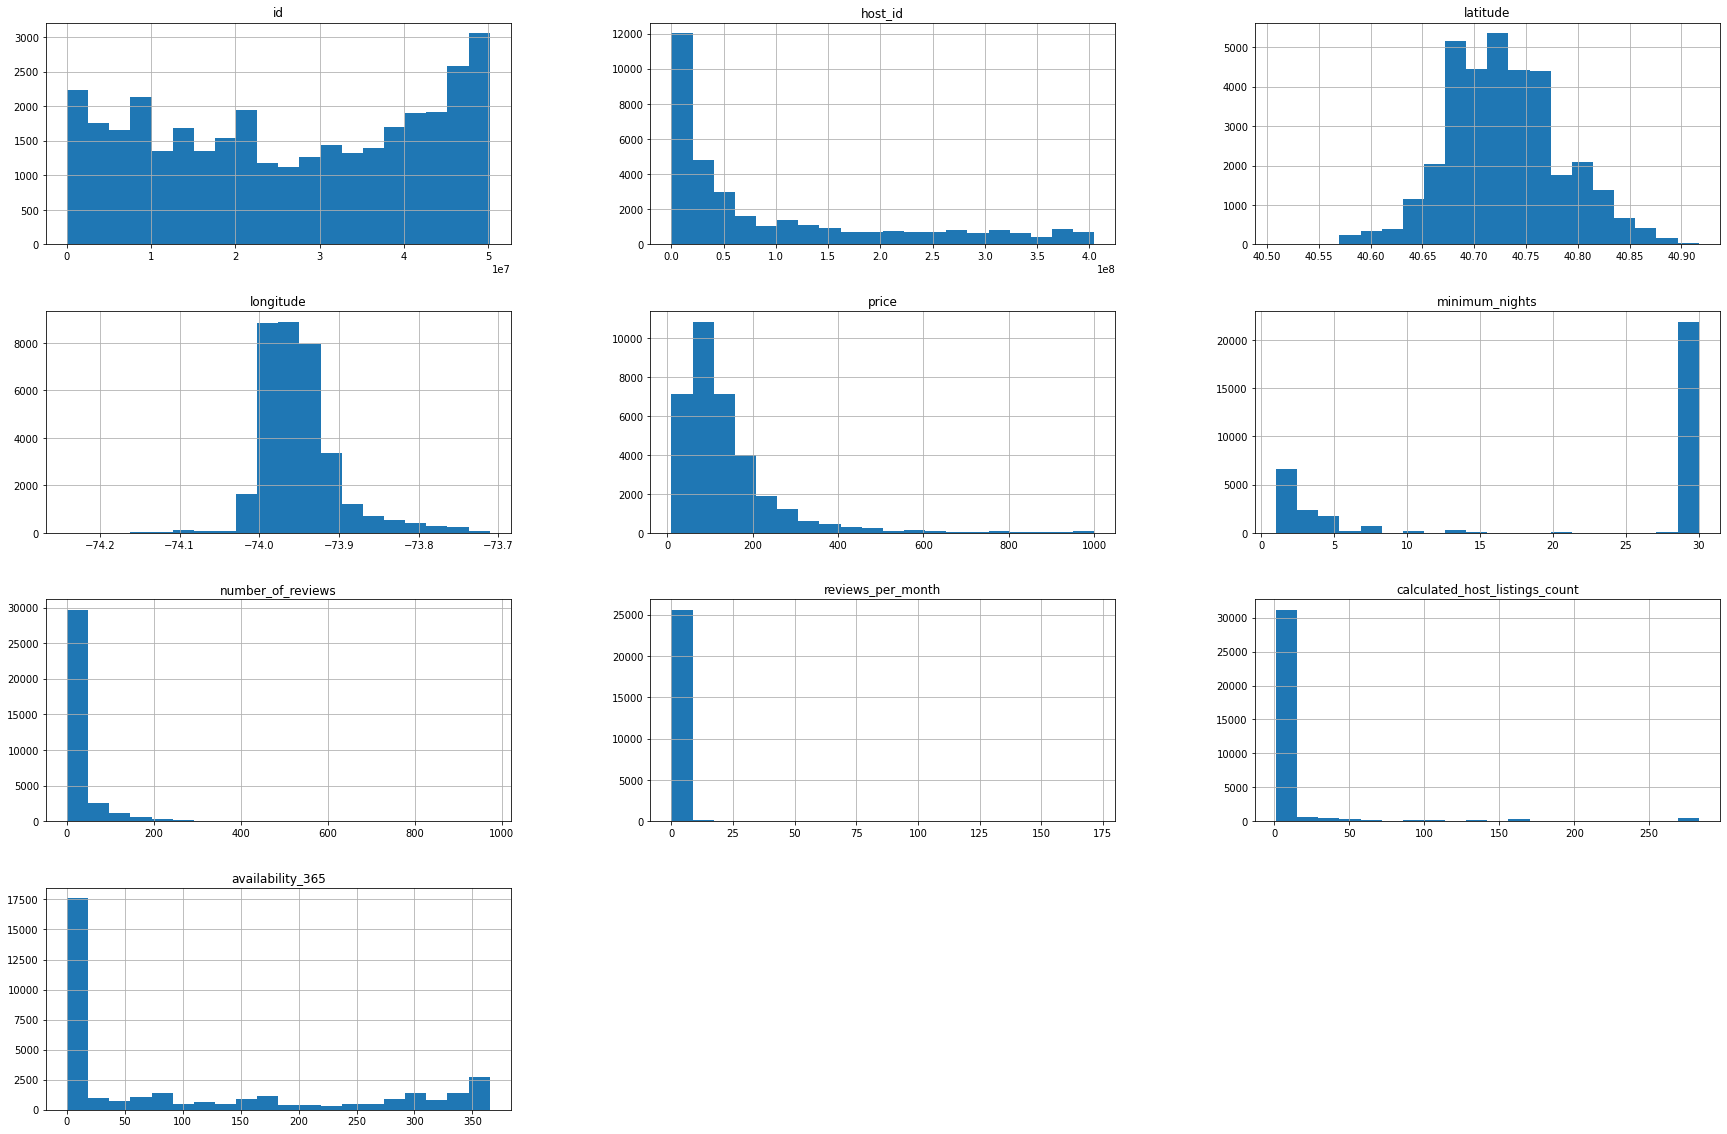

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=20, figsize=(30,20));

### **Q5. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
print('A média de preços é: ',df.price.mean())

A média de preços é:  157.05233232128072


### **Q6. Qual a correlação existente entre as variáveis**?

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.054617,-0.045212,0.003877,0.032684,0.097067
minimum_nights,-0.054617,1.000000,-0.268804,-0.276398,0.140168,-0.146334
number_of_reviews,-0.045212,-0.268804,1.000000,0.378854,-0.104313,0.132278
reviews_per_month,0.003877,-0.276398,0.378854,1.000000,-0.005148,0.122377
calculated_host_listings_count,0.032684,0.140168,-0.104313,-0.005148,1.000000,0.213212
availability_365,0.097067,-0.146334,0.132278,0.122377,0.213212,1.000000


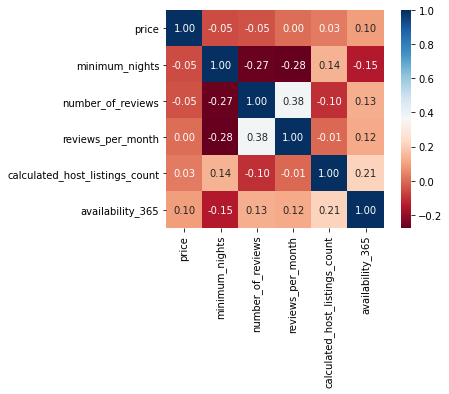

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Pode-se concluir que não há grandes correlações entre diferentes variáveis para este *data frame* específico. O maior valor (0,38) de correlação apresentado na matriz foi entre as variáveis `number_of_reviews` e `reviews_per_month`, que possuem uma correlação óbvia, por uma delas se tratar de um número total de reviews e a outra é expressa em taxa de reviews por mês.

### **Q7. Qual o tipo de imóvel mais comum no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    18112
Private room       15625
Shared room          601
Hotel room           226
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
# Basta dividir os resultados acima pelo número de entradas do Dataframe e multiplicar por 100
print('O percentual de cada tipo de imóvel é:\n',((df_clean.room_type.value_counts() / df_clean.shape[0])*100))

O percentual de cada tipo de imóvel é:
 Entire home/apt    52.401342
Private room       45.205995
Shared room         1.738803
Hotel room          0.653860
Name: room_type, dtype: float64


### **Q8. Qual a localidade mais cara de *New York City*?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros `neighbourhood` a partir do preço de locação. Em seguida também faremos o mesmo para os distritos de *New York* que estão presentes na variável `neighborhood_group`.


In [ ]:
# Vamos observar a média de preços dos 10 bairros mais caros de New York City
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Fort Wadsworth      800.000000
Prince's Bay        397.500000
Tottenville         356.000000
Tribeca             316.165563
Willowbrook         309.000000
Theater District    254.942748
SoHo                249.102881
Arverne             246.089552
Midtown             243.843354
NoHo                241.512195
Name: price, dtype: float64

Deve-se checar também o número de imóveis disponíveis em cada um destes bairros exibidos como os 10 mais caros antes de tomar quaisquer conclusões, pois não seria nada justo dizer que um bairro com apenas um imóvel no Airbnb é o mais caro de *New York City* simplesmente porque este imóvel específico possui um aluguel muito caro.

In [ ]:
print('Fort Wadsworth: ', df_clean[df_clean.neighbourhood == 'Fort Wadsworth'].shape)
print('Prince\'s Bay: ', df_clean[df_clean.neighbourhood == 'Prince\'s Bay'].shape)
print('Tottenville: ', df_clean[df_clean.neighbourhood == 'Tottenville'].shape)
print('Tribeca: ', df_clean[df_clean.neighbourhood == 'Tribeca'].shape)
print('Willowbrook: ', df_clean[df_clean.neighbourhood == 'Willowbrook'].shape)
print('Theater District: ', df_clean[df_clean.neighbourhood == 'Theater District'].shape)
print('SoHo: ', df_clean[df_clean.neighbourhood == 'SoHo'].shape)
print('Arverne: ', df_clean[df_clean.neighbourhood == 'Arverne'].shape)
print('Midtown: ', df_clean[df_clean.neighbourhood == 'Midtown'].shape)
print('NoHo: ', df_clean[df_clean.neighbourhood == 'NoHo'].shape)

Fort Wadsworth:  (1, 16)
Prince's Bay:  (2, 16)
Tottenville:  (1, 16)
Tribeca:  (151, 16)
Willowbrook:  (1, 16)
Theater District:  (262, 16)
SoHo:  (243, 16)
Arverne:  (67, 16)
Midtown:  (1264, 16)
NoHo:  (41, 16)


A partir desta observação podemos desconsiderar completamente os bairros *Fort Wadsworth*, *Prince's Bay*, *Tottenville* e *Willowbrook*, pois todos possuem apenas 1 ou 2 imóveis listados no Airbnb. Um rank justo para os bairros com os imóveis mais caros seria apenas com os bairros remanescentes na lista, logo o bairro considerado mais caro em média de preços é **Tribeca** com uma média de preços de aproximadamente $ 316,00 em um total de 151 imóveis.

In [ ]:
# Vamos observar a média de preços dos 10 distritos mais caros de New York City
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

neighbourhood_group
Manhattan        175.512045
Brooklyn         120.093246
Staten Island    106.488136
Bronx             98.881818
Queens            96.664369
Name: price, dtype: float64

Entre os distritos de *New York City* temos *Manhattan* como a região mais cara. 

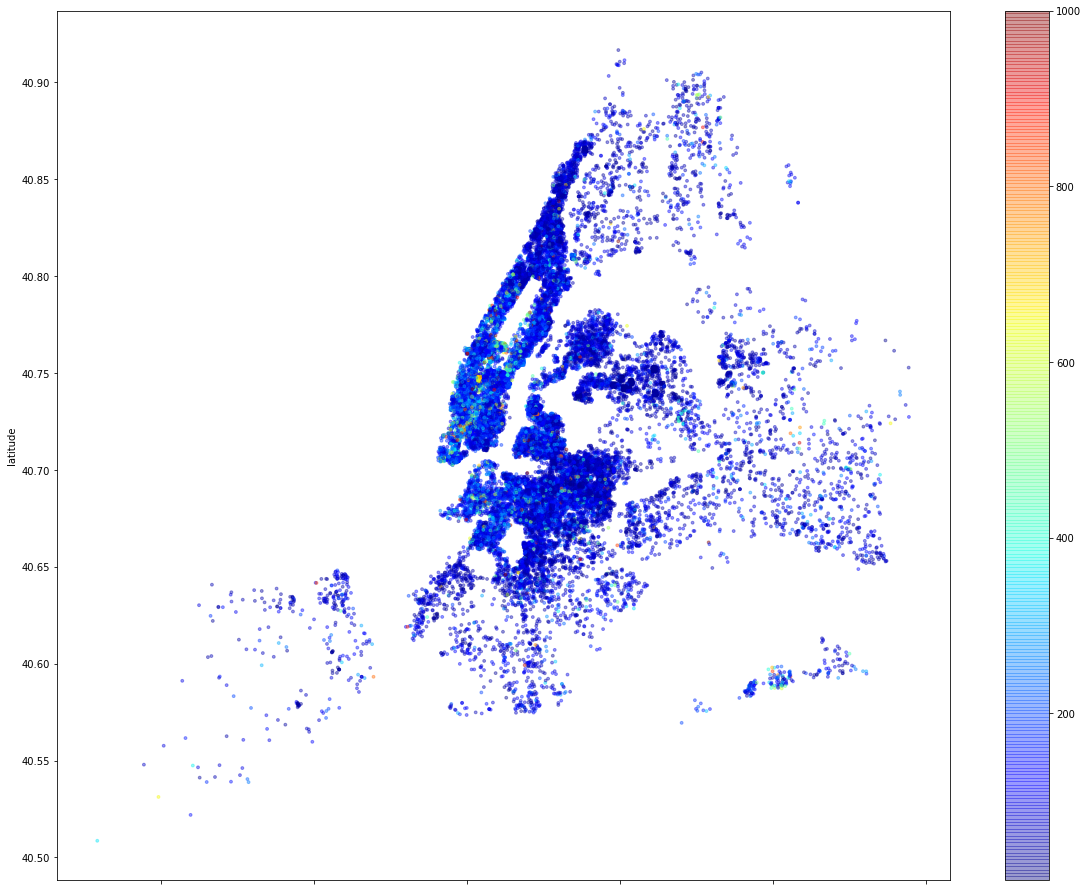

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(20,16));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

20.346227288508274

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. Não foram encontradas grandes correlações entre as variáveis, logo não se pode tirar grandes conclusões utilizando relações entre elas. Porém pode-se concluir a partir desta análise de dados que o distrito de *Manhattan* é sem sombra de dúvidas o mais caro de acordo com os cálculos, e também ganha em número de imóveis disponíveis no Airbnb, pois ao se observar o gráfico gerado a partir das posições de latitude e longitude das entradas é fácil identificar a enorme quantidade de pontos sobre o distrito, o tornando quase um mapa desenhado da ilha, com apenas um espaço em branco onde se encontra o Central Park.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.